<a href="https://colab.research.google.com/github/fiofana/IUCN-red-list/blob/main/endangered_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives**

Analyze species occurrence data to assess biodiversity patterns, identify hotspots, and understand the impact of environmental factors on species distribution.

**Questions to be answered**
*   Overall distribution of concern level
*   Taxonomic groups more commonly associated with higher concern levels
*   Most endangered species in each kingdom
*   Kingdoms, phyla, or classes with exceptionally high or low species diversity
*   Correlation between concern level of a species and its taxonomic classification
*   Correlations between concern levels and the number of species within a family or genus
*   Correlation of presence of missing values with specific taxonomic classifications

<br>

---    

<br>

### About the datasets:
**----> The IUCN Red List of Threatened Species**

It is the world's most comprehensive information source on the global extinction risk status of species, contributing as key indicator of the world's biodiversity health. It is a checklist dataset with only categorical values.

It was made to provide a comprehensive list of the global conservation status of plant and animal species. It aims to highlight species that are facing a high risk of extinction and to raise awareness about the importance of conservation efforts.

> IUCN (2022). The IUCN Red List of Threatened Species. Version 2022-2. https://www.iucnredlist.org. Downloaded on 2023-05-09. https://doi.org/10.15468/0qnb58 accessed via GBIF.org on 2023-11-17. accessed via GBIF.org on 2024-01-08.

# **Data cleaning**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
import os
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/Programação-e-Bioinformática/Endangered")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
distribution.txt  endangered-species.ipynb    meta.xml	 vernacularname.txt
eml.xml		  filtered-endangered-df.csv  taxon.txt


## Taxonomy dataset

In [3]:
taxonomy_headers = ["specific ID", "binomial nomenclature", "kingdom", "phylum",
                    "class", "order", "family", "genus", "species",
                    "authority", "category", "subspecies", "status", "ID",
                    "reference", "URL"]

endangered_taxonomy_df = pd.read_csv("taxon.txt", sep="	", header=None, names=taxonomy_headers)
display(endangered_taxonomy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254583 entries, 0 to 254582
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   specific ID            254583 non-null  object
 1   binomial nomenclature  254583 non-null  object
 2   kingdom                254583 non-null  object
 3   phylum                 150490 non-null  object
 4   class                  150490 non-null  object
 5   order                  150490 non-null  object
 6   family                 150490 non-null  object
 7   genus                  150490 non-null  object
 8   species                150488 non-null  object
 9   authority              248609 non-null  object
 10  category               150490 non-null  object
 11  subspecies             2973 non-null    object
 12  status                 254583 non-null  object
 13  ID                     254583 non-null  int64 
 14  reference              254583 non-null  object
 15  

None

In [4]:
# Deleting columns not relevant to analysis
endangered_taxonomy_df = endangered_taxonomy_df.drop(["specific ID",
                                                      "reference", "URL",
                                                      "subspecies",
                                                      "category",
                                                      "authority"], axis=1)

# Deleting empty ID rows
endangered_taxonomy_df = endangered_taxonomy_df.dropna(subset=["ID"])
display(endangered_taxonomy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254583 entries, 0 to 254582
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   binomial nomenclature  254583 non-null  object
 1   kingdom                254583 non-null  object
 2   phylum                 150490 non-null  object
 3   class                  150490 non-null  object
 4   order                  150490 non-null  object
 5   family                 150490 non-null  object
 6   genus                  150490 non-null  object
 7   species                150488 non-null  object
 8   status                 254583 non-null  object
 9   ID                     254583 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 19.4+ MB


None

In [5]:
# Investigating column
display(endangered_taxonomy_df["status"].unique())

array(['accepted', 'synonym'], dtype=object)

## Distribution dataset

In [6]:
distribution_headers = ["ID", "reference", "unnamed 1", "concern", "unnamed 2",
                    "global", "presence"]

endangered_distribution_df = pd.read_csv("distribution.txt", sep="	", header=None, names=distribution_headers)
display(endangered_distribution_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150490 entries, 0 to 150489
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         150490 non-null  int64  
 1   reference  150490 non-null  object 
 2   unnamed 1  0 non-null       float64
 3   concern    150490 non-null  object 
 4   unnamed 2  0 non-null       float64
 5   global     150490 non-null  object 
 6   presence   150490 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.0+ MB


None

In [7]:
# Investigating these columns
display(endangered_distribution_df["global"].unique())
display(endangered_distribution_df["presence"].unique())

array(['Global'], dtype=object)

array(['Present', 'Absent'], dtype=object)

In [8]:
# Deleting empty and irrelevant columns
endangered_distribution_df = endangered_distribution_df.drop(["unnamed 1",
                                                              "unnamed 2",
                                                              "global",
                                                              "reference"],
                                                             axis=1)
display(endangered_distribution_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150490 entries, 0 to 150489
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ID        150490 non-null  int64 
 1   concern   150490 non-null  object
 2   presence  150490 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


None

## Merged dataframe

In [9]:
endangered_df = pd.merge(endangered_distribution_df, endangered_taxonomy_df, on="ID", how="inner")
display(endangered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254583 entries, 0 to 254582
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID                     254583 non-null  int64 
 1   concern                254583 non-null  object
 2   presence               254583 non-null  object
 3   binomial nomenclature  254583 non-null  object
 4   kingdom                254583 non-null  object
 5   phylum                 150490 non-null  object
 6   class                  150490 non-null  object
 7   order                  150490 non-null  object
 8   family                 150490 non-null  object
 9   genus                  150490 non-null  object
 10  species                150488 non-null  object
 11  status                 254583 non-null  object
dtypes: int64(1), object(11)
memory usage: 23.3+ MB


None

In [10]:
# Deleting rows with low quality
endangered_df = endangered_df[endangered_df["concern"] != "Data Deficient"]
endangered_df = endangered_df[endangered_df["status"] == "accepted"]
endangered_df = endangered_df[endangered_df["presence"] == "Present"]
endangered_df = endangered_df.drop(columns=["status", "presence", "ID"], axis=1)
display(endangered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 128779 entries, 0 to 254582
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   concern                128779 non-null  object
 1   binomial nomenclature  128779 non-null  object
 2   kingdom                128779 non-null  object
 3   phylum                 128779 non-null  object
 4   class                  128779 non-null  object
 5   order                  128779 non-null  object
 6   family                 128779 non-null  object
 7   genus                  128779 non-null  object
 8   species                128778 non-null  object
dtypes: object(9)
memory usage: 9.8+ MB


None

In [11]:
print(endangered_df[endangered_df['species'].isnull()])

           concern             binomial nomenclature   kingdom      phylum  \
111332  Endangered  Iomon nan (Ng & Naiyanetr, 1993)  ANIMALIA  ARTHROPODA   

               class     order     family  genus species  
111332  MALACOSTRACA  DECAPODA  POTAMIDAE  Iomon     NaN  


Investigating the NaN value in `species`, it can be noticed that the species name is "Iomon nan", therefore "nan" has to be converted to an object.

In [12]:
# Replacing "nan" NaN datatype with "nan" object datatype
endangered_df["species"] = endangered_df["species"].replace(np.nan, "nan")

display(endangered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 128779 entries, 0 to 254582
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   concern                128779 non-null  object
 1   binomial nomenclature  128779 non-null  object
 2   kingdom                128779 non-null  object
 3   phylum                 128779 non-null  object
 4   class                  128779 non-null  object
 5   order                  128779 non-null  object
 6   family                 128779 non-null  object
 7   genus                  128779 non-null  object
 8   species                128779 non-null  object
dtypes: object(9)
memory usage: 9.8+ MB


None

In [13]:
display(endangered_df)

,concern,binomial nomenclature,kingdom,phylum,class,order,family,genus,species
0,Endangered,"Calocedrus rupestris Aver., Hiep & L.K.Phan",PLANTAE,TRACHEOPHYTA,PINOPSIDA,PINALES,CUPRESSACEAE,Calocedrus,rupestris
1,Least Concern,Narthecium reverchonii Čelak.,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,DIOSCOREALES,NARTHECIACEAE,Narthecium,reverchonii
2,Endangered,Asparagus humilis Engl.,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,ASPARAGALES,ASPARAGACEAE,Asparagus,humilis
3,Least Concern,Bulbostylis boeckleriana (Schweinf.) Beetle,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,POALES,CYPERACEAE,Bulbostylis,boeckleriana
7,Least Concern,Bulbostylis hispidula (Vahl) R.W.Haines,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,POALES,CYPERACEAE,Bulbostylis,hispidula
...,...,...,...,...,...,...,...,...,...
254576,Endangered,"Ploceus megarhynchus Hume, 1869",ANIMALIA,CHORDATA,AVES,PASSERIFORMES,PLOCEIDAE,Ploceus,megarhynchus
254577,Least Concern,"Microptilotis vicina (Rothschild & Hartert, 1912)",ANIMALIA,CHORDATA,AVES,PASSERIFORMES,MELIPHAGIDAE,Microptilotis,vicina
254579,Least Concern,"Aplonis metallica (Temminck, 1824)",ANIMALIA,CHORDATA,AVES,PASSERIFORMES,STURNIDAE,Aplonis,metallica
254581,Endangered,"Cleptornis marchei (Oustalet, 1889)",ANIMALIA,CHORDATA,AVES,PASSERIFORMES,ZOSTEROPIDAE,Cleptornis,marchei


Converting the concern levels to a qualitative measure (int type) can easy the analysis process. the mapping technique can be used for the different values.

In [14]:
concern_levels = endangered_df["concern"].unique()
print(concern_levels)

['Endangered' 'Least Concern' 'Near Threatened' 'Vulnerable'
 'Critically Endangered' 'least concern' 'near threatened'
 'conservation dependent']


In [15]:
# Normalizing the text in the 'concern' column
endangered_df["concern"] = endangered_df["concern"].str.title()
concern_levels = endangered_df["concern"].unique()

print(concern_levels)

['Endangered' 'Least Concern' 'Near Threatened' 'Vulnerable'
 'Critically Endangered' 'Conservation Dependent']


In [16]:
# Mapping concern levels to numeric values
concern_mapping = {
    "Least Concern": 0,
    "Conservation Dependent": 1,
    "Near Threatened": 2,
    "Vulnerable": 3,
    "Endangered": 4,
    "Critically Endangered": 5
}

endangered_df["concern"] = endangered_df["concern"].replace(concern_mapping).astype(int)

In [17]:
display(endangered_df)
endangered_df.to_csv('filtered-endangered-df.csv', index=False)

,concern,binomial nomenclature,kingdom,phylum,class,order,family,genus,species
0,4,"Calocedrus rupestris Aver., Hiep & L.K.Phan",PLANTAE,TRACHEOPHYTA,PINOPSIDA,PINALES,CUPRESSACEAE,Calocedrus,rupestris
1,0,Narthecium reverchonii Čelak.,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,DIOSCOREALES,NARTHECIACEAE,Narthecium,reverchonii
2,4,Asparagus humilis Engl.,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,ASPARAGALES,ASPARAGACEAE,Asparagus,humilis
3,0,Bulbostylis boeckleriana (Schweinf.) Beetle,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,POALES,CYPERACEAE,Bulbostylis,boeckleriana
7,0,Bulbostylis hispidula (Vahl) R.W.Haines,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,POALES,CYPERACEAE,Bulbostylis,hispidula
...,...,...,...,...,...,...,...,...,...
254576,4,"Ploceus megarhynchus Hume, 1869",ANIMALIA,CHORDATA,AVES,PASSERIFORMES,PLOCEIDAE,Ploceus,megarhynchus
254577,0,"Microptilotis vicina (Rothschild & Hartert, 1912)",ANIMALIA,CHORDATA,AVES,PASSERIFORMES,MELIPHAGIDAE,Microptilotis,vicina
254579,0,"Aplonis metallica (Temminck, 1824)",ANIMALIA,CHORDATA,AVES,PASSERIFORMES,STURNIDAE,Aplonis,metallica
254581,4,"Cleptornis marchei (Oustalet, 1889)",ANIMALIA,CHORDATA,AVES,PASSERIFORMES,ZOSTEROPIDAE,Cleptornis,marchei


In [18]:
display(endangered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 128779 entries, 0 to 254582
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   concern                128779 non-null  int64 
 1   binomial nomenclature  128779 non-null  object
 2   kingdom                128779 non-null  object
 3   phylum                 128779 non-null  object
 4   class                  128779 non-null  object
 5   order                  128779 non-null  object
 6   family                 128779 non-null  object
 7   genus                  128779 non-null  object
 8   species                128779 non-null  object
dtypes: int64(1), object(8)
memory usage: 9.8+ MB


None

# **Exploratory analysis**

In [19]:
!pip install squarify

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

## Data overview

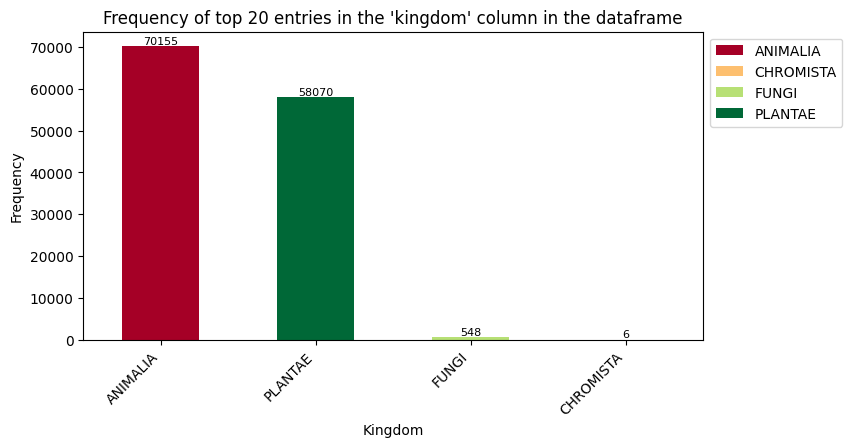

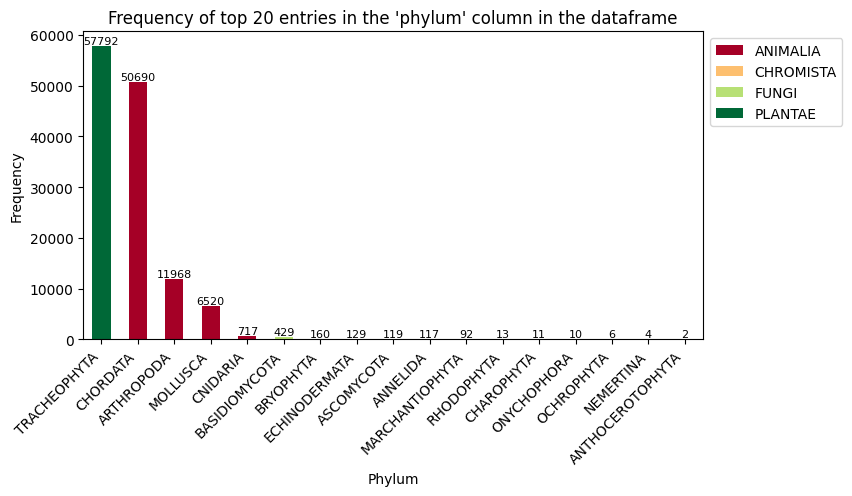

In [ ]:
def plot_top_taxa(df, column_to_graph, filter_size):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_prop_cycle('color', plt.cm.RdYlGn(range(len(df))))

    df.plot(kind="bar", stacked=True, ax=ax, colormap="RdYlGn")

    # Annotate each bar with its frequency value
    for i, (taxon, freq) in enumerate(top_taxa.items()):
        ax.annotate(str(int(freq)), xy=(i, freq), ha="center", va="bottom", fontsize=8, color="black")

    ax.set_xlabel(column_to_graph.capitalize())
    ax.set_ylabel("Frequency")
    ax.set_title(f"Frequency of top {filter_size} entries in the '{column_to_graph}' column in the dataframe")

    plt.xticks(rotation=45, ha="right")
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

    plt.show()

# Group by each column of interest
for column in endangered_df.columns[2:8]:
    grouped_data = endangered_df.pivot_table(index=column, columns="kingdom", aggfunc="size", fill_value=0)

    # Get top X results for each column
    filter_size = 20
    top_taxa = grouped_data.sum(axis=1).nlargest(filter_size)
    top_taxa_df = grouped_data.loc[top_taxa.index]

    plot_top_taxa(top_taxa_df, column, filter_size)


* The most frequent kingdoms in the dataset are `ANIMALIA` and `PLANTAE`.
* The most frequent phyla in the dataset are `TRACHEOPHYTA` from the `PLANTAE` kingdom and `CHORDATA` from the `ANIMALIA` kingdom.
* The most frequent classes in the dataset are `MAGNOLIOPSIDA` from the `PLANTAE` kingdom and `ACTINOPTERYGII` from the `ANIMALIA` kingdom.
* The most frequent orders in the dataset are `SQUAMATA` and `PASSERIFORMES` from the `ANIMALIA` kingdom.
* The most frequent families in the dataset are `FABACEA`  and `RUBIACEAE` from the `PLANTAE` kingdom.
* The most frequent genera in the dataset are `EUCALYPTUS` from the `PLANTAE` kingdom and `CONUS` from the `ANIMALIA` kingdom.

In [21]:
def group_by_and_plot(df, filter_column_idx, main_column_idx):
    filter_column = df.columns[filter_column_idx]
    main_column = df.columns[main_column_idx]

    kingdom_color_dict = {
        "PLANTAE": [0., 0.40784314, 0.21568627, 1.],
        "FUNGI": [0.99346405, 0.74771242, 0.43529412, 1.],
        "CHROMISTA": [0.71764706, 0.87973856, 0.45882353, 1.],
        "ANIMALIA": [0.64705882, 0., 0.14901961, 1.]
    }

    filtered_data = df.groupby(filter_column)[main_column].value_counts().unstack().T
    main_totals = filtered_data.sum(axis=1)
    sorted_filtered_data = filtered_data.loc[main_totals.sort_values(ascending=False).index]

    # Plotting
    num_plots = len(sorted_filtered_data.columns)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
    axes = axes.flatten()

    for i, (group, ax) in enumerate(zip(sorted_filtered_data.columns, axes)):
        current_group_data = sorted_filtered_data[[group]].dropna()

        # Plot the values for the current group with colors based on the kingdom
        for j, (phylum, freq) in enumerate(current_group_data[group].items()):
            kingdom_color = kingdom_color_dict[df.loc[df[main_column] == phylum, "kingdom"].iloc[0]]
            ax.bar(phylum, freq, color=kingdom_color)

            # Annotate each bar with its frequency value
            ax.annotate(str(int(freq)), xy=(phylum, freq), ha="center", va="bottom", fontsize=8, color="black")

        ax.set_xlabel(f"{main_column}")
        ax.set_ylabel("Frequency")
        ax.set_title(f"Frequency of {main_column} in the dataframe for {group}")

        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

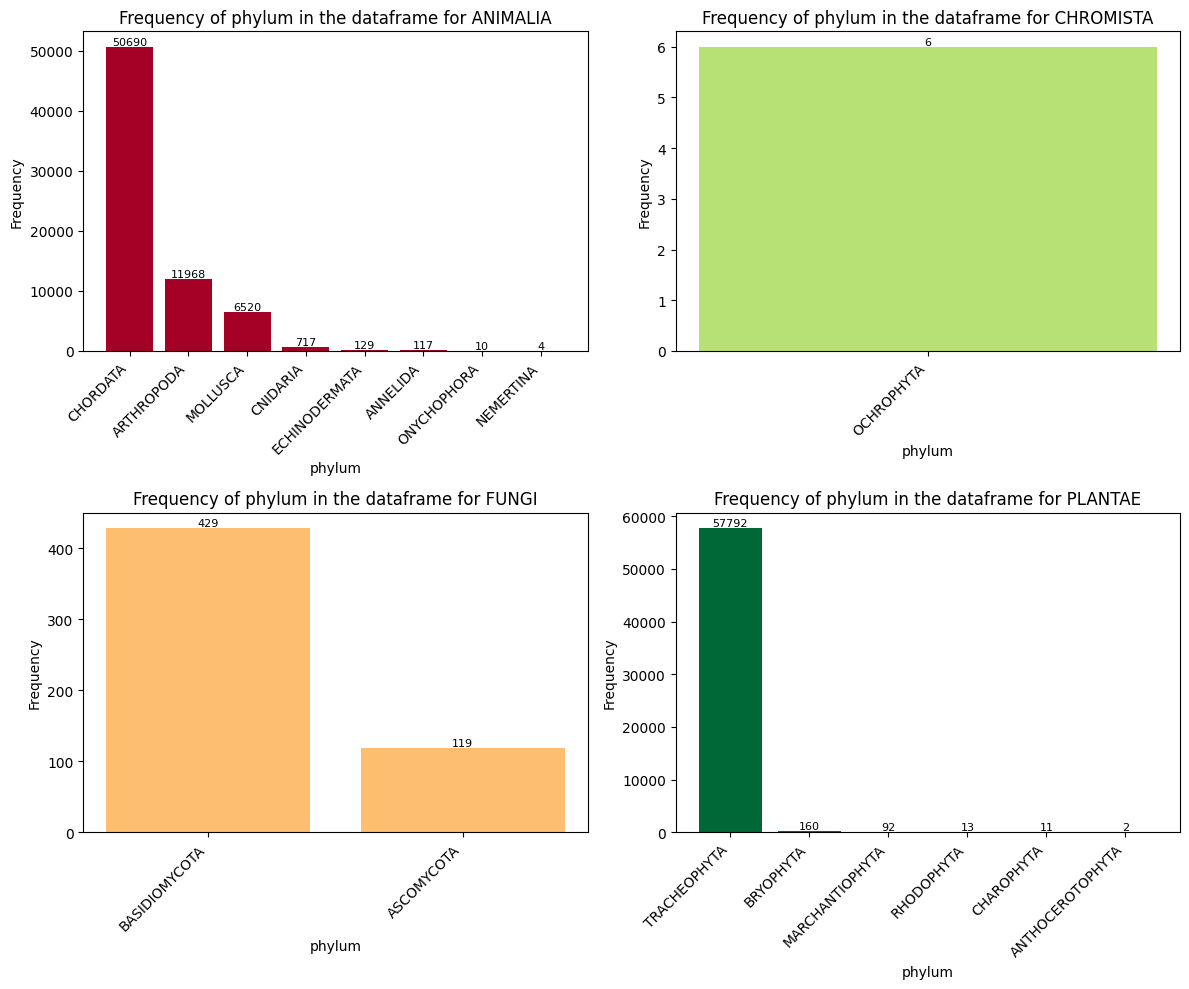

In [22]:
# Phylum by kingdom
group_by_and_plot(endangered_df, 2, 3)

The most frequent phyla in the dataset per kingdom are:
* `CHORDATA` in `ANIMALIA`
* `OCHROPHYTA` in `CHROMISTA`
* `BASIDIOMYCOTA` in `FUNGI` (and it is the only phylum)
* `TRACHEOPHYTA` in `PLANTAE`

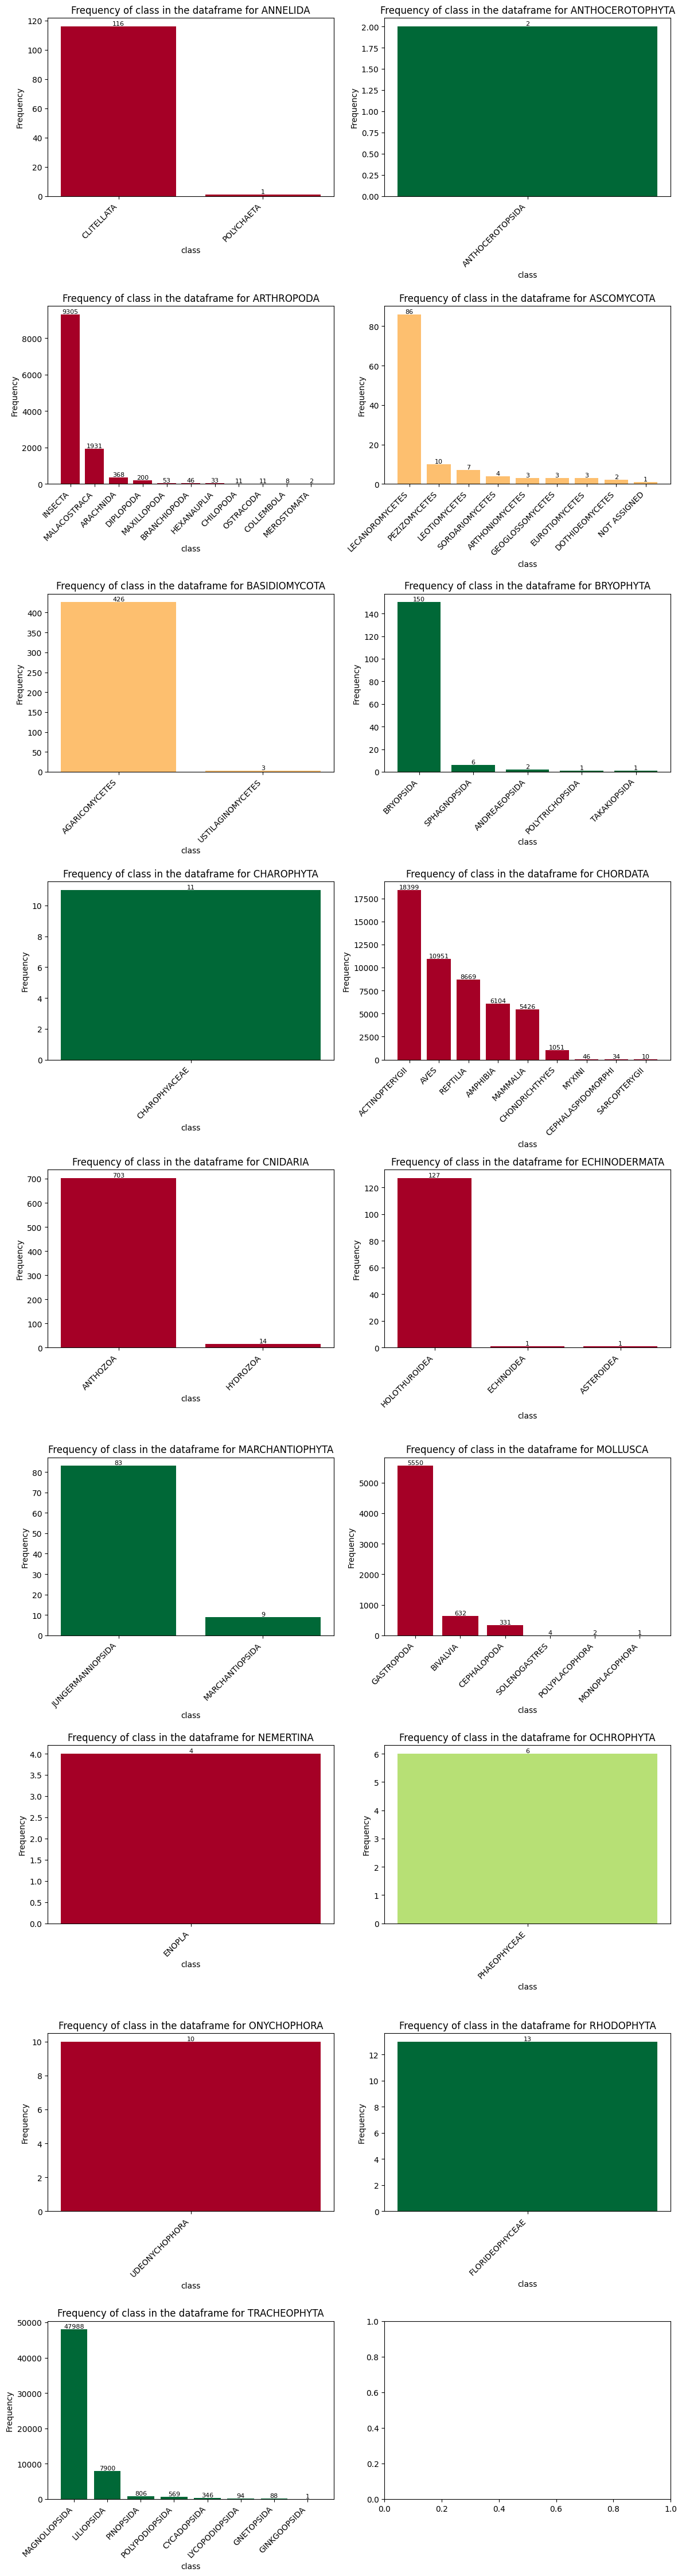

In [23]:
# Class by phylum
group_by_and_plot(endangered_df, 3, 4)

The most frequent classes in the dataset per phylum are:

**ANIMALIA**
* `CLITELLATA` in `ANNELIDA`
* `INSECTA` in `ARTHROPODA`
* `CHAROPHYACEAE` in `CHAROPHYTA` (and it is the only class)
* `ACTINOTERYGII` in `CHORDATA`
* `ANTHZOA` in `CNIDARIA`
* `HOLOTHUROIDEA` in `ECHINODERMATA`
* `GASTROPODA` in `MOLLUSCA`
* `ENOPLA` in `NEMERTINA` (and it is the only class)
* `UDEONYCHOPHORA` in `ONYCHOPHORA`(and it is the only class)

**CHROMISTA**
* `PHAEOPHYCEAE` in `OCHROPHYTA` (and it is the only class)

**FUNGI**
* `LECANOROMYCETES` in `ASCOMYCOTA`
* `AGARICOMYCETES` in `BASIDIOMYCOTA`

**PLANTAE**
* `ANTHOCEROTOPSIDA` in `ANTHOCEROTOPHYTA` (and it is the only class)
* `BRYOPSIDA` in `BRYOPHYTA`
* `JUNGERMANNNIOPSIDA` in `MARCHANTIOPHYTA`
* `FLORIDEOPHYCEAE` in `RHODOPHYTA` (and it is the only class)
* `MAGNOLIOPSIDA` in `TRACHEOPHYTA`

Data overview conclusion:

> The dataset is rich in data from Animalia and Plantae groups, but very lacking in regards of Chromista data.

> Tracheophytra and Chordata are the phyla with most entries by far, even wihtin their own kingdom, which may express a bias towards the species in these phyla in the dataset.


## Concern level analysis

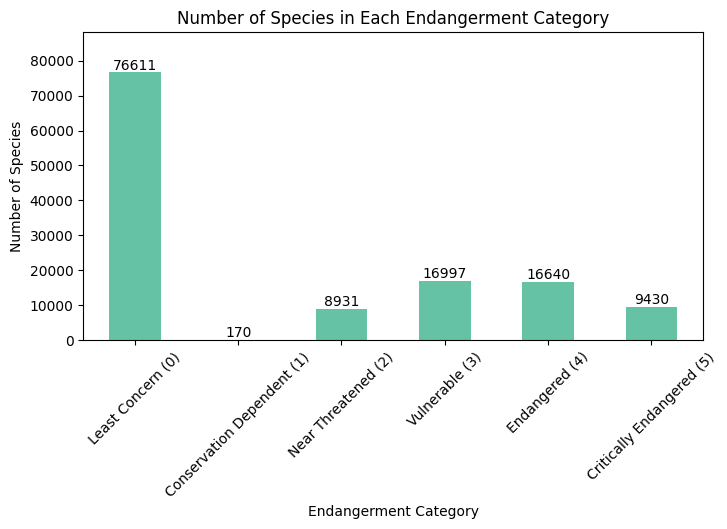

In [24]:
# All entries filtered by concern level
labels = ['Least Concern (0)', 'Conservation Dependent (1)', 'Near Threatened (2)',
          'Vulnerable (3)', 'Endangered (4)', 'Critically Endangered (5)']
species_endangerment_counts = endangered_df['concern'].value_counts()
species_endangerment_counts = species_endangerment_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(8, 4))
ax = species_endangerment_counts.plot(kind='bar', cmap='Set2')

for index, value in enumerate(species_endangerment_counts):
    ax.text(index, value, str(value), ha='center', va='bottom')

plt.title('Number of Species in Each Endangerment Category')
plt.xlabel('Endangerment Category')
plt.ylabel('Number of Species')
plt.xticks(range(len(labels)), labels, rotation=45)

# Set y-axis maximum value
plt.ylim(top=species_endangerment_counts.max() * 1.15)

plt.show()

In [25]:
# Calculate probaliities
total_species = species_endangerment_counts.sum()
species_endangerment_probabilities = species_endangerment_counts / total_species
species_endangerment_probabilities = species_endangerment_probabilities.sort_index()

print(f'The probability of a given species (of a total of {total_species} species) being in each concern level is:')
for endangerment_level, probability in species_endangerment_probabilities.items():
    print(f'{endangerment_level} - {probability:.2%}')

The probability of a given species (of a total of 128779 species) being in each concern level is:
0 - 59.49%
1 - 0.13%
2 - 6.94%
3 - 13.20%
4 - 12.92%
5 - 7.32%


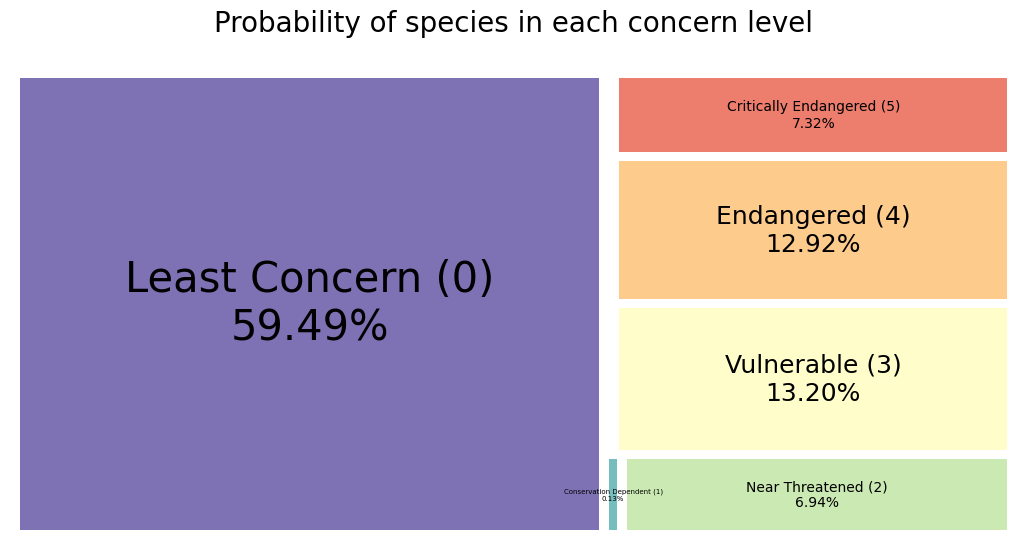

In [26]:
# Data for treemap
labels = ["Least Concern (0)", "Conservation Dependent (1)", "Near Threatened (2)",
          "Vulnerable (3)", "Endangered (4)", "Critically Endangered (5)"]
sizes = species_endangerment_probabilities.tolist()
label_sizes = [f"{label}\n{size:.2%}" for label, size in zip(labels, sizes)]

# Generate colors from the colormap
cmap = plt.get_cmap('Spectral_r')
colors = [cmap(i / len(labels)) for i in range(len(labels))]

# Plotting the treemap
plt.figure(figsize=(13, 6))
ax = squarify.plot(sizes=sizes, label=label_sizes, alpha=0.8, color=colors, pad=True)

# Adjust text size based on rectangle size
for text in ax.texts:
    size = float(text.get_text().split('\n')[-1].replace('%', '')) / 100
    if size < 0.01:
        text.set_fontsize(5)
    elif 0.01 < size < 0.1:
        text.set_fontsize(10)
    elif 0.1 < size < 0.15:
        text.set_fontsize(18)
    elif size > 0.15:
        text.set_fontsize(30)

plt.title('Probability of species in each concern level', fontsize=20, pad=30)
plt.axis('off')
plt.show()

> Most species in the dataframe are in the `"Least Concern"` level of endangerment (59.49%).

> The level of endangerment with least species is `"Conservation Dependent"` (0.13%).